In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

rcParams['figure.figsize'] = 8, 5
COLORS = ['r', 'g', 'b', 'c', 'm', 'y', 'purple', 'lime', 'pink', 'yellow', 'orange', 'brown']

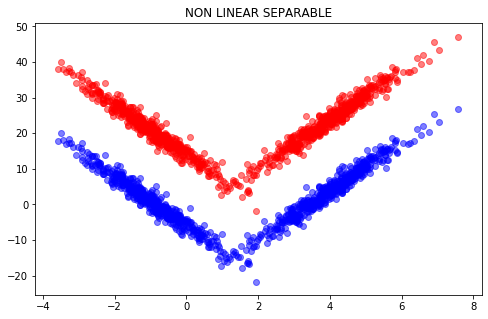

In [14]:
data = []
for i in range(1, 3):
    d = pd.read_csv(f'class{i}.txt', header=None, delimiter=',')
    data.append(d)
    d['class'] = i - 1
    

data.append(pd.concat(data).reset_index(drop=True))


nls_c1, nls_c2, nls=tuple(data)

plt.scatter(nls_c1[0], nls_c1[1], color=COLORS[2], alpha=0.5)

plt.scatter(nls_c2[0], nls_c2[1], color=COLORS[0], alpha=0.5)
plt.title("NON LINEAR SEPARABLE")
plt.show()

In [6]:
X=nls.drop('class', axis = 1).to_numpy()
y=nls['class']

In [7]:
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300, viz=False):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.curr_iter = 0
        self.cluster_centers = None
        self.viz = viz
        
        
    def fit(self, X):
        # Choosing random points as cluster centers.
       
        indices = np.random.choice(X.shape[0], self.n_clusters)
        self.cluster_centers = np.float32(X[indices])
        # print("claster centre")
        print(self.cluster_centers)

        cluster_assignments = self.assign_clusters(X)
        # print("assignment")
        # print(cluster_assignments)
        self.show_clusters(X, cluster_assignments) if self.viz else None
        
        while self.curr_iter < self.max_iter:
            self.curr_iter += 1
            # Update cluster centers using the mean of cluster points.
            self.update_centers(X, cluster_assignments)

            # Assigning new clusters based on the updated cluster centers.
            new_assignments = self.assign_clusters(X)

            # If no change, then break.
            flag = np.all(new_assignments == cluster_assignments)
            if (flag):
                break
            
            # Update the cluster assignments.
            cluster_assignments = new_assignments
            self.show_clusters(X, cluster_assignments) if self.viz else None
            
    def update_centers(self, X, cluster_assignments):
        for i in range(self.n_clusters):
            self.cluster_centers[i] = np.mean(X[cluster_assignments == i], axis=0)   
            
    def show_clusters(self, X, cluster_assignments):
        for i in range(self.n_clusters):
            plt.scatter(X[cluster_assignments == i, 0],
                        X[cluster_assignments == i, 1],
                        color=COLORS[i],
                        alpha=0.5)

            plt.scatter(self.cluster_centers[i][0],
                        self.cluster_centers[i][1],
                        color=COLORS[i],
                        s=300,
                        edgecolors='b')
        plt.title(f"Clusters after {self.curr_iter} iterations.")
        #plt.axis('equal')
        plt.show()
        
    def assign_clusters(self, X):
        cluster_assignments = None
        
        min_dist = np.array([float('inf')] * X.shape[0])
        
        for i in range(self.n_clusters):
            # Distance of each point from the ith cluster center.
            dist = np.sqrt(np.sum((X - self.cluster_centers[i])**2, axis=1))
            
            # Assigning ith cluster to the points where distance is lesser
            # than the previous assignment.
            cluster_assignments = np.where(dist < min_dist, i, cluster_assignments)
            
            # Updating the minimum distance for points.
            min_dist = np.where(dist < min_dist, dist, min_dist)
     
        return cluster_assignments
    
    def segment_img(self, img):
        # Convert cluster centers to pixel values.
        clusters = np.uint8(self.cluster_centers)
        # Assign cluster to each pixel.
        cluster_assignments = self.assign_clusters(img)
        # print(cluster_assignments)
        # print(clusters)
        # print(np.uint8(cluster_assignments))

        # Create segmented image with cluster values as pixel values.
        segmented = clusters[np.uint8(cluster_assignments)]
        return segmented
    
    def segment_img_1(self, img):
        # Convert cluster centers to pixel values.
        clusters = np.uint8(self.cluster_centers[:, :3])
        # Assign cluster to each pixel.
        cluster_assignments = self.assign_clusters(img)
        # Create segmented image with cluster values as pixel values.
        segmented = clusters[np.uint8(cluster_assignments)]
        return segmented


In [8]:
from PIL import Image

raw_img = Image.open('Image.jpg')
raw_img = np.asarray(raw_img)
print(raw_img.shape)
img = raw_img.reshape((-1,3))
print(img.shape)

(1067, 1600, 3)
(1707200, 3)


In [9]:
img_vals = np.float32(img)
print(max(img_vals[0]), max(img_vals[1]), max(img_vals[2]))

173.0 160.0 155.0


In [10]:
m2 = KMeans(2, viz=False)
m2.fit(img)

[[ 93. 143.  90.]
 [255.  52.  71.]]


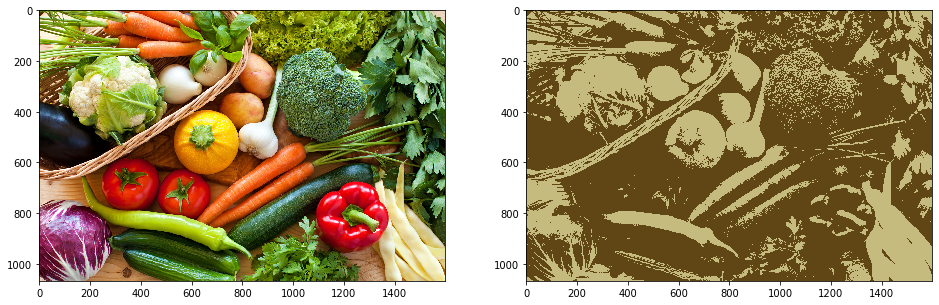

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape((1067, 1600, 3)))
segmented1 = m2.segment_img(img).reshape((1067, 1600, 3))
# print(m2.segment_img(img))
ax[1].imshow(segmented1)

In [42]:
m3 = KMeans(3, viz=False)
m3.fit(img)

[[ 72. 136.  39.]
 [222. 218. 171.]
 [238.  89.   0.]]


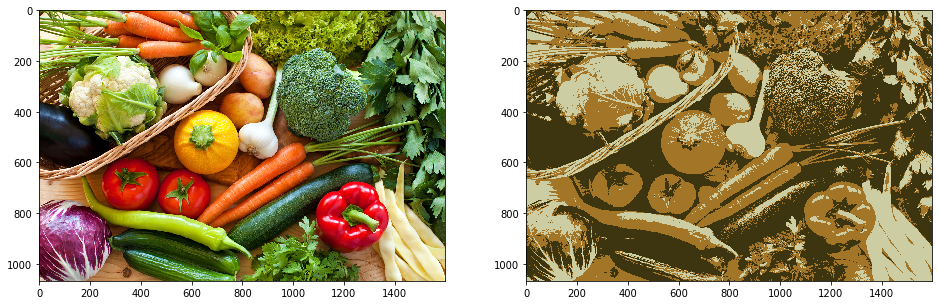

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape((1067, 1600, 3)))
segmented2 = m3.segment_img(img).reshape((1067, 1600, 3))
ax[1].imshow(segmented2)

[[253. 127.  43.]
 [ 22.  43.   2.]
 [ 61.  29.   8.]
 [ 43.   9.   0.]
 [ 17.  27.  16.]]


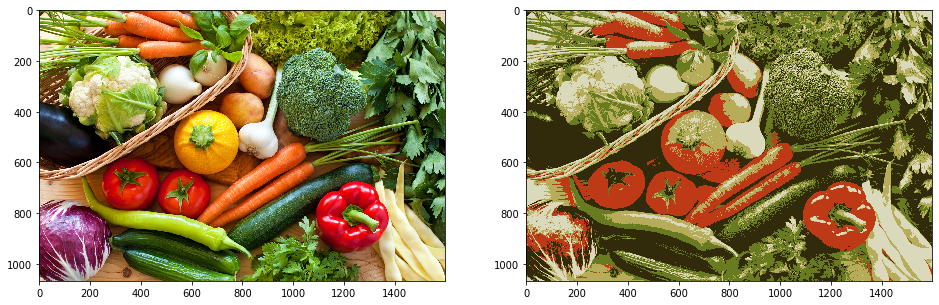

In [44]:
m4 = KMeans(5, viz=False)
m4.fit(img)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape((1067, 1600, 3)))
segmented3 = m4.segment_img(img).reshape((1067, 1600, 3))
ax[1].imshow(segmented3)

In [11]:
data = np.zeros((raw_img.shape[0], raw_img.shape[1], 5))

for i in range(raw_img.shape[0]):
    for j in range(raw_img.shape[1]):
        pixel = raw_img[i][j]
        data[i][j] = np.array([pixel[0], pixel[1], pixel[2], i, j])

data = data.reshape((-1, 5))

In [46]:
m5 = KMeans(20, viz=False)
m5.fit(data)

[[1.440e+02 1.010e+02 6.900e+01 9.930e+02 1.227e+03]
 [8.000e+00 1.300e+01 0.000e+00 8.690e+02 9.580e+02]
 [1.460e+02 1.820e+02 8.400e+01 7.510e+02 5.590e+02]
 [2.200e+02 1.930e+02 1.040e+02 1.044e+03 1.454e+03]
 [5.500e+01 8.200e+01 1.000e+00 1.140e+02 7.780e+02]
 [7.200e+01 1.300e+01 0.000e+00 6.770e+02 9.180e+02]
 [9.000e+01 1.130e+02 4.100e+01 3.900e+02 1.298e+03]
 [1.500e+01 6.000e+00 1.000e+00 9.470e+02 1.162e+03]
 [9.200e+01 1.000e+02 0.000e+00 1.530e+02 1.172e+03]
 [8.500e+01 2.300e+01 2.000e+00 3.670e+02 7.210e+02]
 [6.000e+01 3.300e+01 6.000e+00 5.120e+02 1.326e+03]
 [1.180e+02 1.000e+00 7.000e+00 7.700e+02 6.610e+02]
 [8.000e+01 2.800e+01 4.000e+00 6.510e+02 4.730e+02]
 [6.300e+01 9.700e+01 2.000e+00 1.045e+03 4.970e+02]
 [1.790e+02 1.010e+02 6.200e+01 3.000e+00 5.840e+02]
 [6.900e+01 8.800e+01 6.000e+00 3.950e+02 1.212e+03]
 [1.380e+02 1.970e+02 8.700e+01 1.063e+03 7.400e+02]
 [2.070e+02 1.470e+02 9.700e+01 4.970e+02 4.100e+02]
 [1.150e+02 1.530e+02 5.400e+01 1.019e+03 1.17

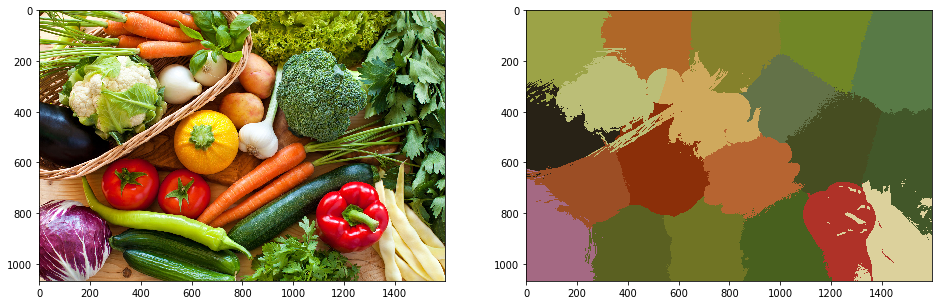

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape((1067, 1600, 3)))
segmented1 = m5.segment_img_1(data).reshape((1067, 1600, 3))
ax[1].imshow(segmented1)

In [12]:
m6 = KMeans(4, viz=False)
m6.fit(data)



[[255. 244. 230. 635.  45.]
 [ 94. 150.   0. 103. 632.]
 [135. 163.  16.  86. 116.]
 [240. 141.  58.  91. 490.]]


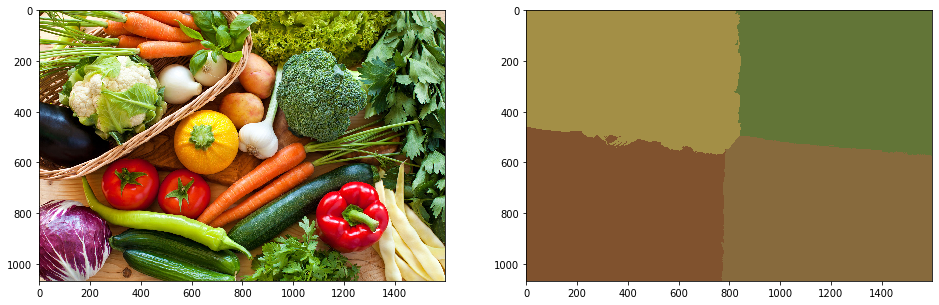

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].imshow(img.reshape((1067, 1600, 3)))
segmented1 = m6.segment_img_1(data).reshape((1067, 1600, 3))
ax[1].imshow(segmented1)